In [30]:
import tensorflow as tf
from tensorflow.keras import models,layers
import matplotlib.pyplot as plt
import numpy as np

In [44]:
IMAGE_SIZE = 256
BATCH_SIZE = 32
CHANNELS = 3
EPOCHS=40

In [32]:
dataset=tf.keras.preprocessing.image_dataset_from_directory(
    "PlantVillage",
    shuffle=True,
    image_size=(IMAGE_SIZE, IMAGE_SIZE),
    batch_size=BATCH_SIZE,
)

Found 2152 files belonging to 3 classes.


In [33]:
class_names = dataset.class_names
class_names

['Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy']

In [34]:
len(dataset)

68

In [35]:
for image_batch,label_batch in dataset.take(1):
    print(image_batch.shape)
    print(label_batch.numpy())

(32, 256, 256, 3)
[0 0 1 0 0 1 1 0 1 1 2 1 0 1 2 0 0 1 1 0 0 1 0 1 0 0 1 0 0 1 0 2]


In [36]:
for image_batch,label_batch in dataset.take(1):
    print(image_batch[0])#tensor
    print(image_batch[0].numpy())
    print(image_batch[0].shape)

tf.Tensor(
[[[123. 112. 118.]
  [160. 149. 155.]
  [131. 120. 126.]
  ...
  [178. 171. 178.]
  [175. 168. 175.]
  [174. 167. 174.]]

 [[116. 105. 111.]
  [139. 128. 134.]
  [155. 144. 150.]
  ...
  [179. 172. 179.]
  [177. 170. 177.]
  [176. 169. 176.]]

 [[122. 111. 117.]
  [127. 116. 122.]
  [114. 103. 109.]
  ...
  [179. 172. 179.]
  [179. 172. 179.]
  [179. 172. 179.]]

 ...

 [[140. 130. 139.]
  [136. 126. 135.]
  [133. 123. 132.]
  ...
  [165. 159. 171.]
  [162. 156. 168.]
  [155. 149. 161.]]

 [[129. 119. 128.]
  [126. 116. 125.]
  [124. 114. 123.]
  ...
  [163. 157. 169.]
  [160. 154. 166.]
  [159. 153. 165.]]

 [[116. 106. 115.]
  [117. 107. 116.]
  [120. 110. 119.]
  ...
  [160. 154. 166.]
  [157. 151. 163.]
  [161. 155. 167.]]], shape=(256, 256, 3), dtype=float32)
[[[123. 112. 118.]
  [160. 149. 155.]
  [131. 120. 126.]
  ...
  [178. 171. 178.]
  [175. 168. 175.]
  [174. 167. 174.]]

 [[116. 105. 111.]
  [139. 128. 134.]
  [155. 144. 150.]
  ...
  [179. 172. 179.]
  [177. 17

2025-03-25 02:28:37.255119: I tensorflow/core/framework/local_rendezvous.cc:407] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Visualize Image

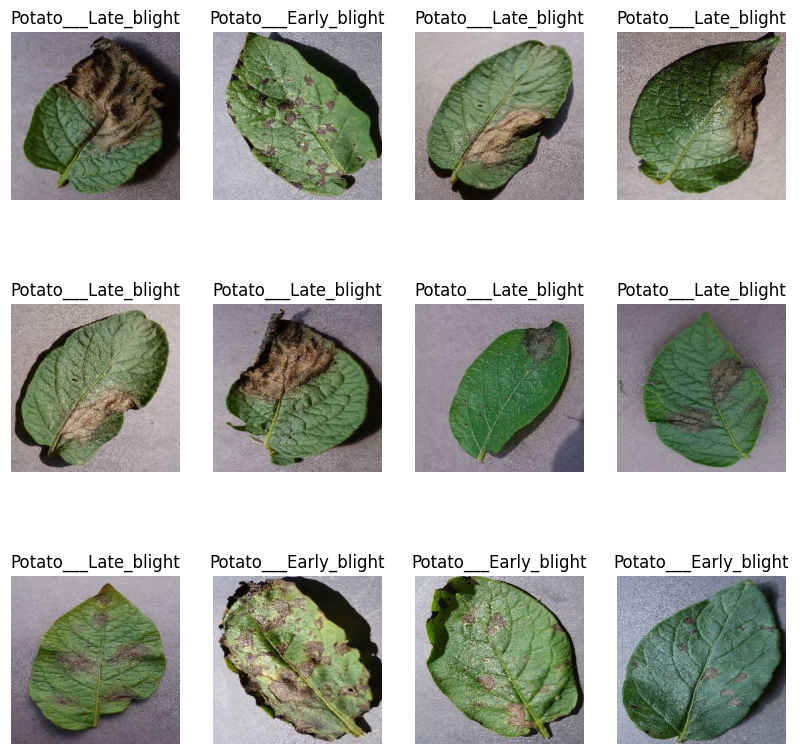

In [43]:
plt.figure(figsize=(10,10))
for image_batch,label_batch in dataset.take(1):
    for i in range(12):
        ax=plt.subplot(3,4,i+1)
        plt.imshow(image_batch[i].numpy().astype("uint8"))
        plt.title(class_names[label_batch[i]])
        plt.axis("off")


Train

In [61]:
train_size=0.8
len(dataset)*train_size



54.400000000000006

In [62]:
train_ds = dataset.take(54)
len(train_ds)

54

In [63]:
test_ds = dataset.skip(54)    #arr[54:]
len(test_ds)

14

In [64]:
val_size=0.1
len(dataset)*val_size

6.800000000000001

In [65]:
val_ds = test_ds.take(6)
len(val_ds)

6

In [66]:
test_ds = test_ds.skip(6)
len(test_ds)

8

In [69]:
def get_dataset_partitions_tf(ds,train_split=0.8,val_split=0.1,test_split=0.1,shuffle=True,shuffle_size=10000):

    ds_size=len(ds)

    if shuffle:
        ds=ds.shuffle(shuffle_size,seed=12)

    train_size=int(train_split*ds_size)
    val_size=int(val_split*ds_size)


    train_ds=ds.take(train_size)

    val_ds=ds.skip(train_size).take(val_size)
    test_ds=ds.skip(train_size).skip(val_size)

    return train_ds,val_ds,test_ds


In [70]:
train_ds,val_ds,test_ds=get_dataset_partitions_tf(dataset)

In [71]:
train_ds=train_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
val_ds=val_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
test_ds=test_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)

Normalization

In [77]:
resize_and_rescale = tf.keras.Sequential([
    layers.Resizing(IMAGE_SIZE,IMAGE_SIZE),
    layers.Rescaling(1.0/255),
])

Data Augmentation

In [78]:
data_augmentation = tf.keras.Sequential([
    layers.RandomFlip("horizontal_and_vertical"),
    layers.RandomRotation(0.2),
])

### Model Building

In [79]:
input_shape=(BATCH_SIZE,IMAGE_SIZE,IMAGE_SIZE,CHANNELS)
n_classes=3
model=models.Sequential([
    resize_and_rescale,
    data_augmentation,
    layers.Conv2D(32,(3,3),activation='relu',input_shape=input_shape),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,(3,3),activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,(3,3),activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,(3,3),activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,(3,3),activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,(3,3),activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Flatten(),
    layers.Dense(64,activation='relu'),
    layers.Dense(n_classes,activation='softmax')
])
model.build(input_shape=input_shape)

/Users/ayberkpalta/PycharmProjects/PotatoProject/.venv/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [80]:
model.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ sequential_2 (Sequential)       │ (32, 256, 256, 3)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ sequential_3 (Sequential)       │ (32, 256, 256, 3)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (32, 254, 254, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (32, 127, 127, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (32, 125, 125, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (32, 62, 62, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (32, 60, 60, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (32, 30, 30, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (32, 28, 28, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (32, 14, 14, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (32, 12, 12, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (32, 6, 6, 64)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (32, 4, 4, 64)         │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (32, 2, 2, 64)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (32, 256)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (32, 64)               │        16,448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (32, 3)                │           195 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 183,747 (717.76 KB)

 Trainable params: 183,747 (717.76 KB)

 Non-trainable params: 0 (0.00 B)

In [81]:
model.compile(
    optimizer="adam",
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=["accuracy"]
)

In [82]:
history=model.fit(
    train_ds,
    epochs=EPOCHS,
    batch_size=BATCH_SIZE,
    verbose=1,
    validation_data=val_ds,
)

Epoch 1/40
54/54 ━━━━━━━━━━━━━━━━━━━━ 24s 428ms/step - accuracy: 0.4321 - loss: 0.9329 - val_accuracy: 0.6250 - val_loss: 0.7945
Epoch 2/40
54/54 ━━━━━━━━━━━━━━━━━━━━ 21s 396ms/step - accuracy: 0.6295 - loss: 0.7698 - val_accuracy: 0.7656 - val_loss: 0.5096
Epoch 3/40
54/54 ━━━━━━━━━━━━━━━━━━━━ 22s 399ms/step - accuracy: 0.7724 - loss: 0.5217 - val_accuracy: 0.8854 - val_loss: 0.2726
Epoch 4/40
54/54 ━━━━━━━━━━━━━━━━━━━━ 23s 433ms/step - accuracy: 0.8229 - loss: 0.4526 - val_accuracy: 0.8958 - val_loss: 0.2275
Epoch 5/40
54/54 ━━━━━━━━━━━━━━━━━━━━ 23s 424ms/step - accuracy: 0.8757 - loss: 0.3193 - val_accuracy: 0.8646 - val_loss: 0.3094
Epoch 6/40
54/54 ━━━━━━━━━━━━━━━━━━━━ 22s 412ms/step - accuracy: 0.8855 - loss: 0.2783 - val_accuracy: 0.9635 - val_loss: 0.0961
Epoch 7/40
54/54 ━━━━━━━━━━━━━━━━━━━━ 22s 410ms/step - accuracy: 0.9349 - loss: 0.1646 - val_accuracy: 0.8802 - val_loss: 0.2957
Epoch 8/40
54/54 ━━━━━━━━━━━━━━━━━━━━ 24s 440ms/step - accuracy: 0.9161 - loss: 0.2401 - val_accu

In [83]:
scores=model.evaluate(test_ds)

8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 106ms/step - accuracy: 0.9655 - loss: 0.0836


In [84]:
scores

[0.09353319555521011, 0.96484375]

In [85]:
history

In [86]:
history.params

{'verbose': 1, 'epochs': 40, 'steps': 54}

In [87]:
history.history.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

In [88]:
len(history.history['accuracy'])

40

In [89]:
history.history['accuracy']

[0.47164350748062134,
 0.6817129850387573,
 0.7957175970077515,
 0.8211805820465088,
 0.8958333134651184,
 0.8981481194496155,
 0.9438657164573669,
 0.9346064925193787,
 0.9548611044883728,
 0.9600694179534912,
 0.9577546119689941,
 0.96875,
 0.9762731194496155,
 0.9751157164573669,
 0.96875,
 0.9670138955116272,
 0.984375,
 0.9693287014961243,
 0.9849537014961243,
 0.9849537014961243,
 0.9589120149612427,
 0.9785879850387573,
 0.9699074029922485,
 0.9826388955116272,
 0.9907407164573669,
 0.9872685074806213,
 0.9855324029922485,
 0.9803240895271301,
 0.9866898059844971,
 0.9895833134651184,
 0.9884259104728699,
 0.9837962985038757,
 0.9861111044883728,
 0.9832175970077515,
 0.9913194179534912,
 0.9924768805503845,
 0.9571759104728699,
 0.9872685074806213,
 0.9861111044883728,
 0.9901620149612427]

Plot-History

In [90]:
acc=history.history['accuracy']
val_acc=history.history['val_accuracy']

loss= history.history['loss']
val_loss= history.history['val_loss']

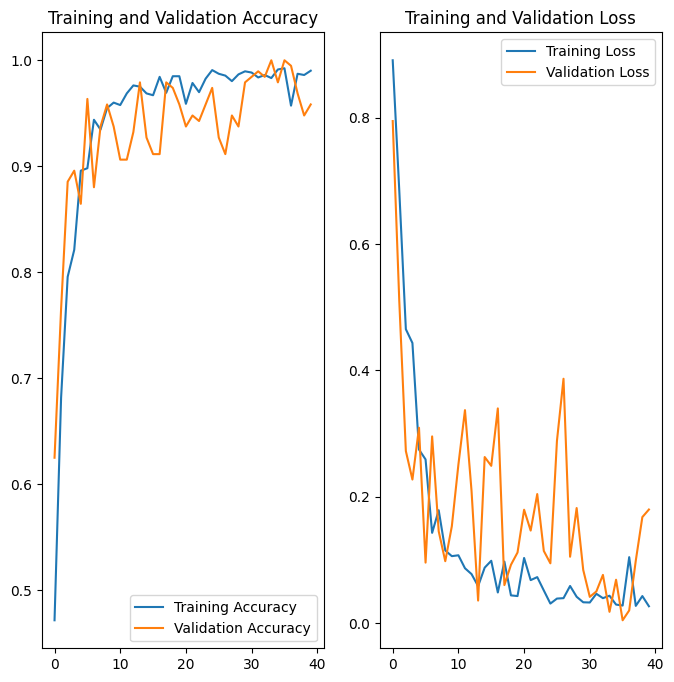

In [92]:
plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(range(EPOCHS), acc, label="Training Accuracy")
plt.plot(range(EPOCHS), val_acc, label="Validation Accuracy")
plt.legend(loc="lower right")
plt.title("Training and Validation Accuracy")

plt.subplot(1, 2, 2)
plt.plot(range(EPOCHS), loss, label="Training Loss")
plt.plot(range(EPOCHS), val_loss, label="Validation Loss")
plt.legend(loc="upper right")
plt.title("Training and Validation Loss")
plt.show()

PREDICT

first image to predict
actual label: Potato___Late_blight
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 208ms/step
prediction labels: Potato___Late_blight


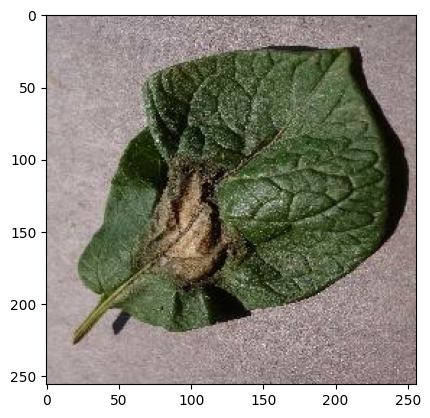

In [93]:
for images_batch,labels_batch in test_ds.take(1):
    first_image=images_batch[0].numpy().astype("uint8")
    first_label=labels_batch[0].numpy()

    print("first image to predict")
    plt.imshow(first_image)
    print("actual label:" , class_names[first_label])

    batch_prediction=model.predict(images_batch)
    print("prediction labels:" , class_names[np.argmax(batch_prediction[0])])

Write a function for inference


In [94]:
def predict(model, img):
    img_array = tf.keras.preprocessing.image.img_to_array(images[i].numpy())
    img_array = tf.expand_dims(img_array, 0)

    predictions = model.predict(img_array)

    predicted_class = class_names[np.argmax(predictions[0])]
    confidence = round(100 * (np.max(predictions[0])), 2)
    return predicted_class, confidence

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step


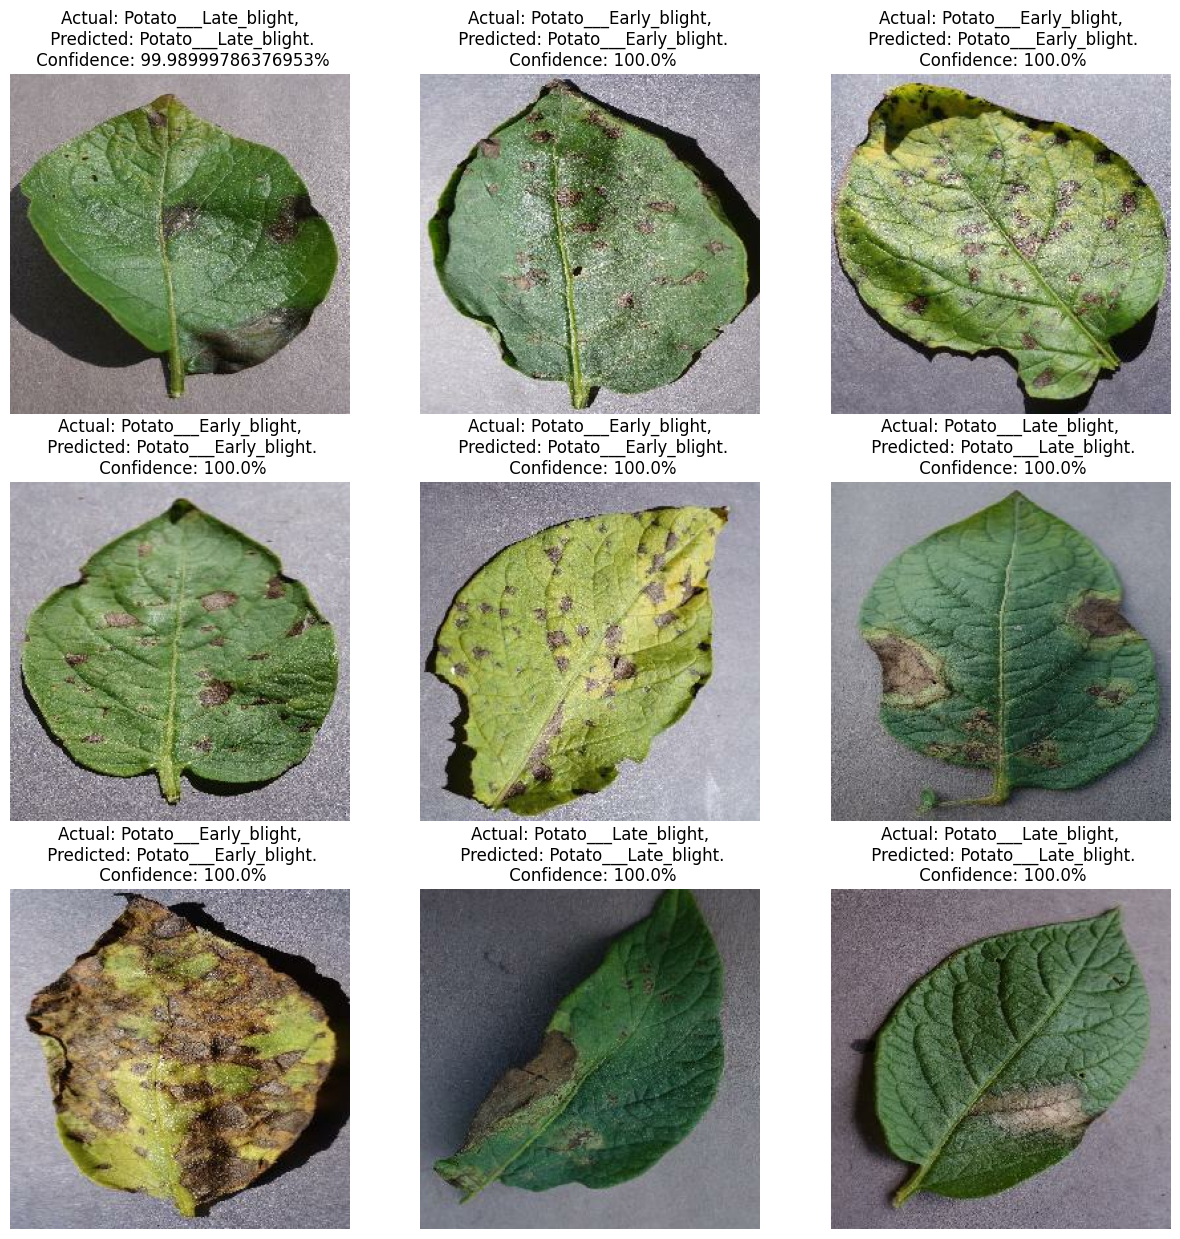

In [98]:
plt.figure(figsize=(15,15))
for images, labels in test_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.axis("off")

        predicted_class, confidence = predict(model, images[i].numpy())
        actual_class = class_names[labels[i]]

        plt.title(f"Actual: {actual_class},\n Predicted: {predicted_class}.\n Confidence: {confidence}%")

        plt.axis("off")

In [110]:
models_version=1
model.export(f"../models/{models_version}")

INFO:tensorflow:Assets written to: ../models/1/assets


INFO:tensorflow:Assets written to: ../models/1/assets


Saved artifact at '../models/1'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name='keras_tensor')
Output Type:
  TensorSpec(shape=(None, 3), dtype=tf.float32, name=None)
Captures:
  6398299216: TensorSpec(shape=(), dtype=tf.resource, name=None)
  6398299600: TensorSpec(shape=(), dtype=tf.resource, name=None)
  6398302096: TensorSpec(shape=(), dtype=tf.resource, name=None)
  6398302864: TensorSpec(shape=(), dtype=tf.resource, name=None)
  6398301328: TensorSpec(shape=(), dtype=tf.resource, name=None)
  6398301712: TensorSpec(shape=(), dtype=tf.resource, name=None)
  6398304016: TensorSpec(shape=(), dtype=tf.resource, name=None)
  6398303248: TensorSpec(shape=(), dtype=tf.resource, name=None)
  6398303056: TensorSpec(shape=(), dtype=tf.resource, name=None)
  6398304976: TensorSpec(shape=(), dtype=tf.resource, name=None)
  6398304784: TensorSpec(shape=(), dtype=tf.resource, name=None)
  6398

NameError: name 'model' is not defined